# Introduction to Bayesian inference with PyMC3

Talks:
- Thomas Wiecki PyData 2014: https://vimeo.com/79518830
- Eric J Ma: PyCon AU 2017 https://www.youtube.com/watch?v=p1IB4zWq9C8
- Christopher Fonnesbeck PyCon AU 2017: https://www.youtube.com/watch?v=5TyvJ6jXHYE
- John Salvatier: Bayesian inference with PyMC3 (PyData Seattle 2015)

Books:
- Cam Davidson-Pilon: Probabilistic Programming and Bayesian Methods for Hackers

Machine learning models are often used as black boxes that are unable to convey what they have learned.

## Probabilistic programming:
- open box models. Toolboxes, rich probabilistic frameworks

We can't observe the causes (they are latent), only the data. Bayes' theorem allows us to invert this to make inferences about the unknown causes.

In [3]:
!conda install --yes pymc3

Fetching package metadata .................
Solving package specifications: .

Package plan for installation in environment /Users/schofield/anaconda/envs/py36:

The following NEW packages will be INSTALLED:

    joblib:      0.11-py36_0              
    libgpuarray: 0.6.4-0                  
    mako:        1.0.6-py36_0             
    mkl-service: 1.1.2-py36_3             
    nose:        1.3.7-py36_1             
    pygpu:       0.6.4-py36_0             
    pymc3:       3.0-py36_0    conda-forge
    theano:      0.9.0-py36_0             
    tqdm:        4.14.0-py36_0            

libgpuarray-0. 100% |################################| Time: 0:00:00   3.41 MB/s
joblib-0.11-py 100% |################################| Time: 0:00:00   5.09 MB/s
mkl-service-1. 100% |################################| Time: 0:00:00   4.42 MB/s
nose-1.3.7-py3 100% |################################| Time: 0:00:00   1.71 MB/s
tqdm-4.14.0-py 100% |################################| Time: 0:00:00   3.22 MB/

In [51]:
import pymc3 as pm
import numpy as np
import theano
import matplotlib.pyplot as plt

In [52]:
%matplotlib inline

### Traditional start: coin-flipping experiment

What is the probability $\theta$ of the coin coming up heads?

Case 1: You see 1 head and 2 tails.

Case 2: You see 331 heads and 669 tails.

In [84]:
n = 100

In [85]:
θ_true = 0.4

In [86]:
data = np.random.sample(size=n) < θ_true

In [87]:
data   # True is heads

array([ True, False,  True,  True, False, False, False, False, False,
        True,  True, False,  True, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True, False, False,  True,  True, False, False,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True, False, False,  True,  True], dtype=bool)

In [88]:
heads = data.sum()   # True is heads
heads

42

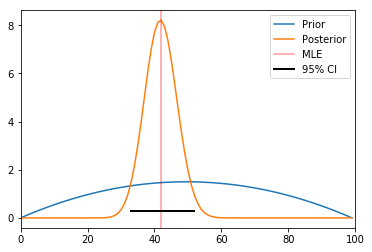

In [89]:
from scipy import stats
a, b = 2, 2
prior = stats.beta(a, b)
post = stats.beta(heads+a, n-heads+b)
ci = post.interval(0.95)

xs = np.linspace(0, 1, 100)
plt.plot(prior.pdf(xs), label='Prior')
plt.plot(post.pdf(xs), label='Posterior')
plt.axvline(100*heads/n, c='red', alpha=0.4, label='MLE')
plt.xlim([0, 100])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.legend()

In [90]:
n

100

In [99]:
with pm.Model() as model:
    θ = pm.Beta('θ', a, b)
    obs = pm.Binomial('obs', n=n, p=θ, observed=heads)

/Users/schofield/anaconda/envs/py36/lib/python3.6/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
INFO (theano.gof.compilelock): Refreshing lock /Users/schofield/.theano/compiledir_Darwin-16.6.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock


In [152]:
niter = 10**4

In [153]:
with model:
    #start = pm.find_MAP()
    #step = pm.NUTS(state=start)
    trace = pm.sample(niter)   # , step

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -4.2496: 100%|██████████| 200000/200000 [00:12<00:00, 16146.94it/s]
Finished [100%]: Average ELBO = -4.2469
INFO (theano.gof.compilelock): Refreshing lock /Users/schofield/.theano/compiledir_Darwin-16.6.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock
 16%|█▌        | 1610/10000 [00:00<00:03, 2152.94it/s]**OUTPUT MUTED**

In [105]:
type(θ)

pymc3.model.TransformedRV

In [154]:
import seaborn as sns

In [155]:
xs = θ.random(size=10**5)

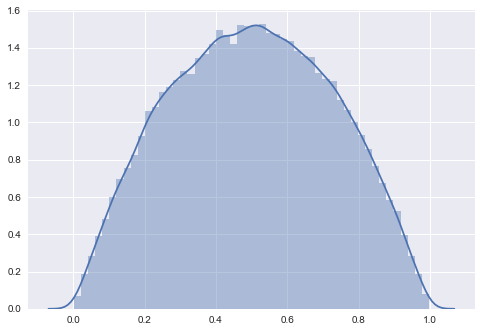

In [156]:
sns.distplot(xs)

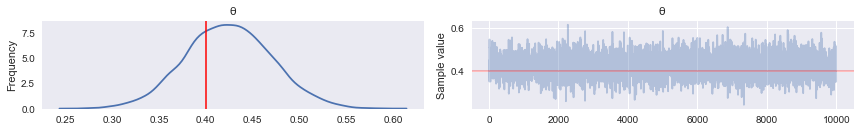

In [161]:
axes = pm.traceplot(trace[0:], lines={'θ': θ_true})

Wiecki wrote the GLM sub-module of PyMC3 to simplify the code to do e.g. Bayesian linear regression

Choice of priors: hard to get it too wrong if it's less informative. However, it's a missed opportunity if you **do** have more prior information.

PyMC3 is very simple because it's built on Theano. So it's easy to add new features and samplers and probability distributions. Much simpler than e.g. STAN, which is highly complex templated C++ code.

Theano gives us the gradient information on the model automatically, which is why there was a re-write to PyMC3, because the cool No U-Turn Sampler (NUTS) (Andrew Gelman) needs the gradient information.

## Resources

Book: Statistical Rethinking

Port of the code examples to PyMC3: https://github.com/aloctavodia/Statistical-Rethinking-with-Python-and-PyMC3


## Example: UK coal mining disasters 1851 to 1962

In [3]:
%run shortcut_imports.ipy

/Users/schofield/anaconda/envs/bayesml/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [41]:
disasters_data = pd.read_csv('coal_mining_disasters.csv')
disasters_data[:5]

,year,disasters
0,1851,4.0
1,1852,5.0
2,1853,4.0
3,1854,0.0
4,1855,1.0


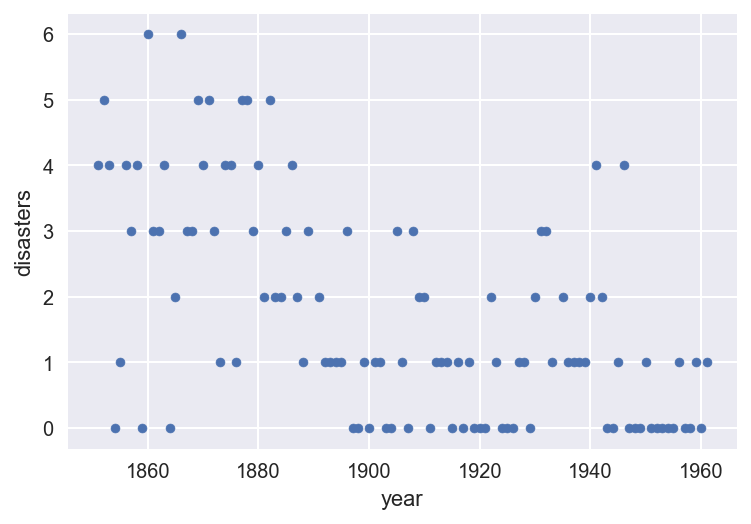

In [42]:
disasters_data.plot.scatter('year', 'disasters');

In [47]:
import pymc3 as pm
with pm.Model() as disaster_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=year.min(), upper=year.max(), testval=1900)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= year, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=disasters_data['disasters'])

### Exercise: instead of assuming a switchpoint in your model, try out a regression instead that is linear in the rate.

In [66]:
with disaster_model:
    trace_disasters = pm.sample(10**4)

Assigned Metropolis to switchpoint
Assigned NUTS to early_rate_log_
Assigned NUTS to late_rate_log_
Assigned Metropolis to disasters_missing
100%|██████████| 10000/10000 [00:13<00:00, 766.95it/s]


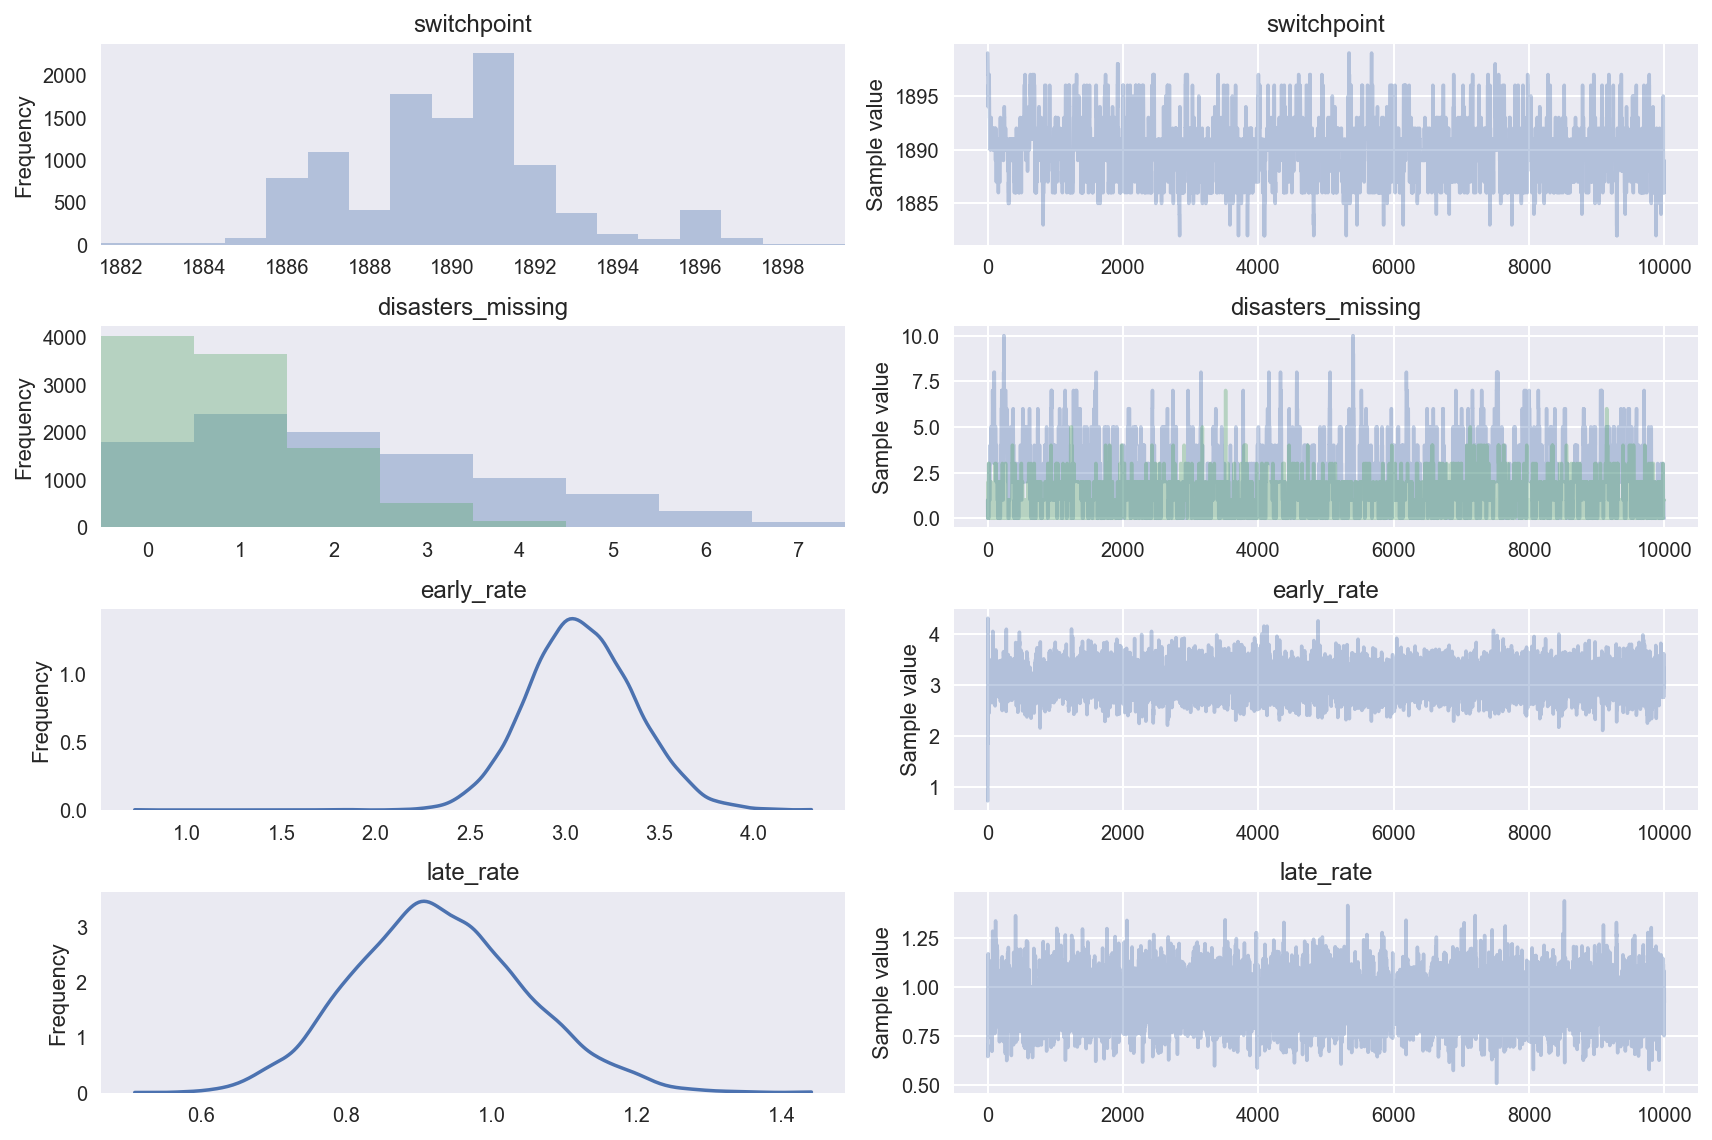

In [67]:
pm.traceplot(trace_disasters);

## Example 2: stochastic volatility model for ASX 500 data

In [55]:
filename = '../Data/ASX2.h5'
pd.HDFStore(filename).keys()[:5]

['/ALL', '/AMC', '/AMP', '/ANZ', '/APA']

In [56]:
asx = pd.read_hdf(filename, 'ALL')

In [69]:
asx[:5]

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
1996-07-31,3.18,3.18,3.18,3.18,0.0,0.36847
1996-08-30,3.18,3.18,3.18,3.18,0.0,0.36847
1996-09-30,3.55,3.55,3.55,3.55,0.0,0.41134
1996-10-31,3.75,3.75,3.75,3.75,0.0,0.43681
1996-11-29,3.48,3.48,3.48,3.48,0.0,0.40536


In [61]:
returns = asx['Adjusted Close'].pct_change().dropna()

In [62]:
returns[:5]

Date
1996-08-30    0.000000
1996-09-30    0.116346
1996-10-31    0.061920
1996-11-29   -0.071999
1996-12-31   -0.060341
Name: Adjusted Close, dtype: float64

In [63]:
with pm.Model() as sp500_model:
    nu = pm.Exponential('nu', 1./10, testval=5.)
    sigma = pm.Exponential('sigma', 1./.02, testval=.1)

    s = pm.GaussianRandomWalk('s', sigma**-2, shape=len(returns))
    volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s))

    r = pm.StudentT('r', nu, lam=1/volatility_process, observed=returns)

INFO (theano.gof.compilelock): Refreshing lock /Users/schofield/.theano/compiledir_Darwin-16.6.0-x86_64-i386-64bit-i386-3.6.1-64/lock_dir/lock


In [64]:
with sp500_model:
    trace_asx = pm.sample(10**4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO (theano.gof.compilelock): Refreshing lock /Users/schofield/.theano/compiledir_Darwin-16.6.0-x86_64-i386-64bit-i386-3.6.1-64/lock_dir/lock
  6%|▋         | 12742/200000 [00:19<05:32, 563.59it/s]**OUTPUT MUTED**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aa1d978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119db3be0>]], dtype=object)

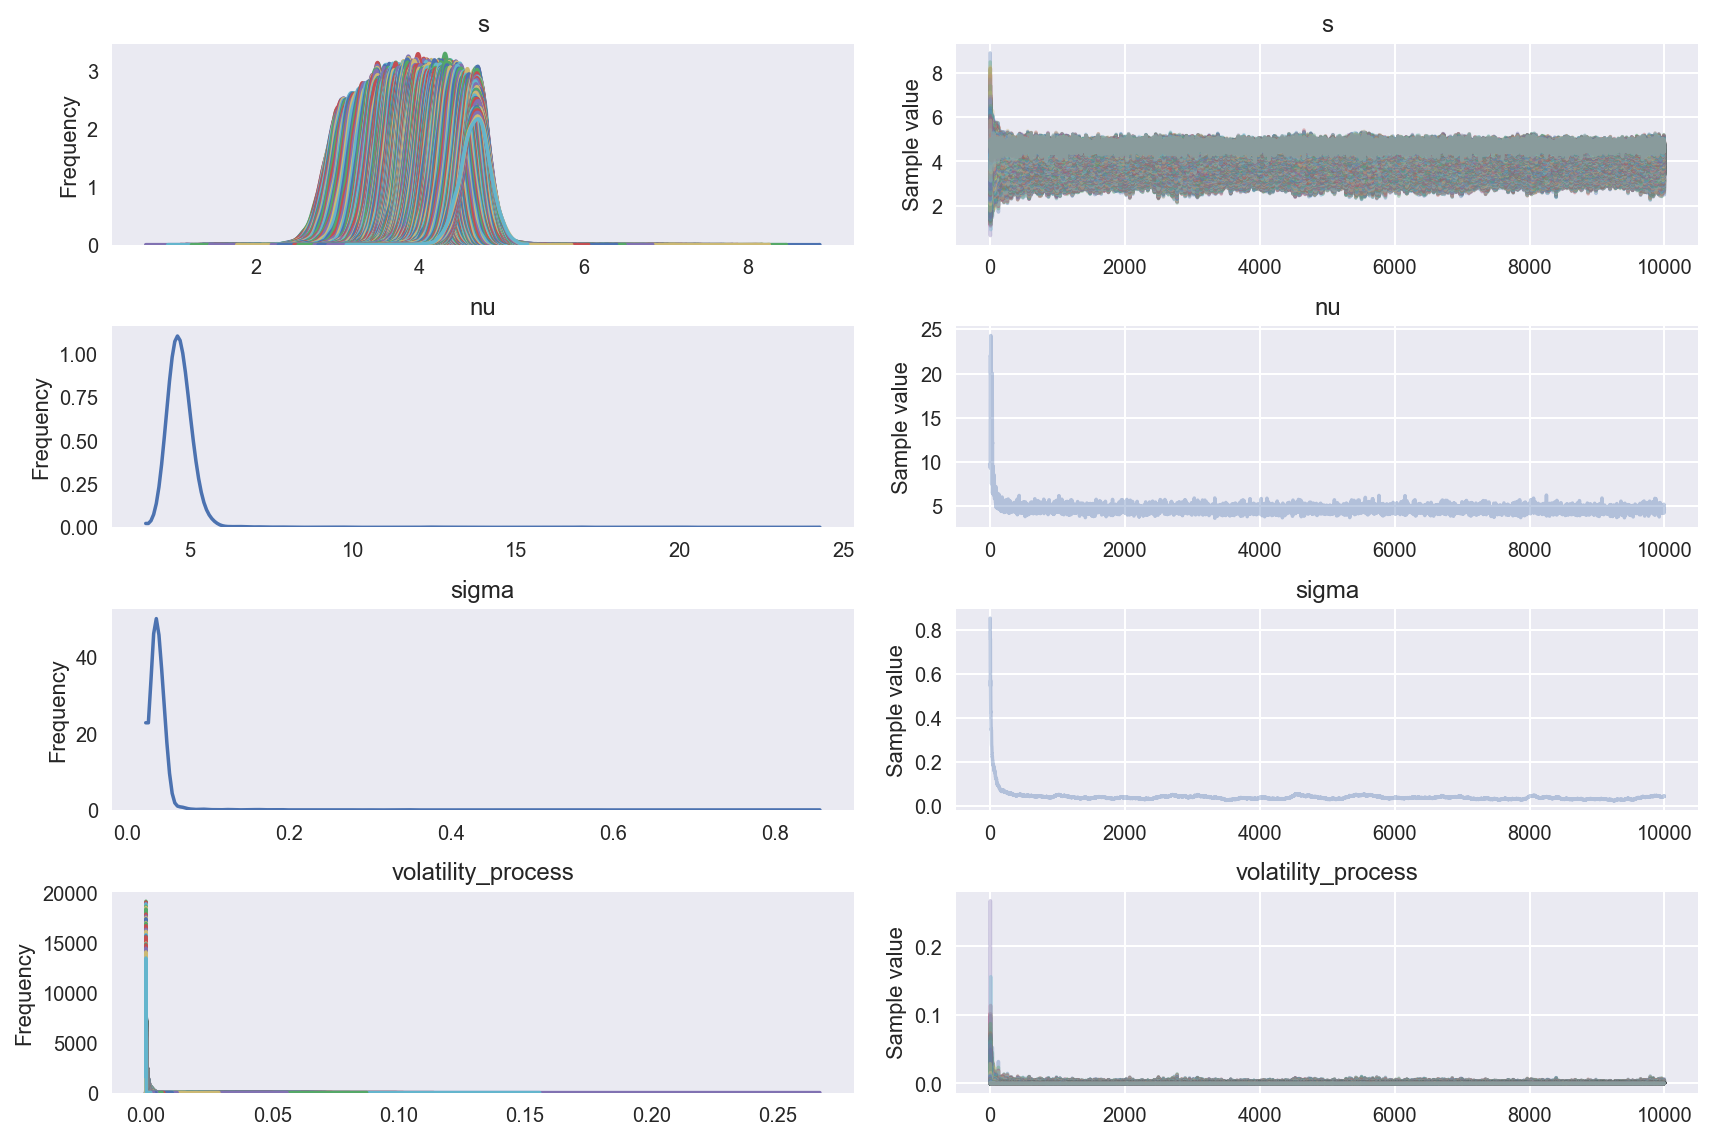

In [70]:
pm.traceplot(trace_asx);

### Next steps in complexity:

Generalized linear models (with full uncertainty). See here:

See the Advanced PyMC3 repo here: https://github.com/springcoil/advanced_pymc3